**Name: Monika Maharjan**


**Student ID: 2409042**

#**Regression**

---




**1. Exploratory Data Analysis and Data Understanding**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the figure size for all plots
plt.rcParams['figure.figsize'] = (6, 6)


In [48]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/WEEK2/healthcare_dataset 3.csv")

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Preview the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
df.head()

# Display basic statistics of the dataset
df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [49]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Drop missing values if any
df_cleaned = df.dropna()

# Verify if missing values are removed
print("\nMissing Values After Dropping:")
print(df.isnull().sum())


Missing Values in Each Column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Missing Values After Dropping:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [50]:
# Convert categorical columns to numerical using factorize
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = pd.factorize(df_cleaned[column])[0]

# Display summary statistics
print("Summary Statistics:")
print(df_cleaned.describe())


Summary Statistics:
               Name           Age        Gender    Blood Type  \
count  55500.000000  55500.000000  55500.000000  55500.000000   
mean   25016.400685     51.539459      0.499568      3.494901   
std    14421.157121     19.602454      0.500004      2.289674   
min        0.000000     13.000000      0.000000      0.000000   
25%    12531.750000     35.000000      0.000000      1.000000   
50%    25049.500000     52.000000      0.000000      3.000000   
75%    37504.250000     68.000000      1.000000      5.000000   
max    49991.000000     89.000000      1.000000      7.000000   

       Medical Condition  Date of Admission        Doctor      Hospital  \
count       55500.000000       55500.000000  55500.000000  55500.000000   
mean            2.502955         891.825514  18466.634937  17644.296450   
std             1.708692         525.731723  11711.615490  11832.712692   
min             0.000000           0.000000      0.000000      0.000000   
25%             1.0

#**Data Analysis and Visualization**

<Figure size 1200x1000 with 0 Axes>

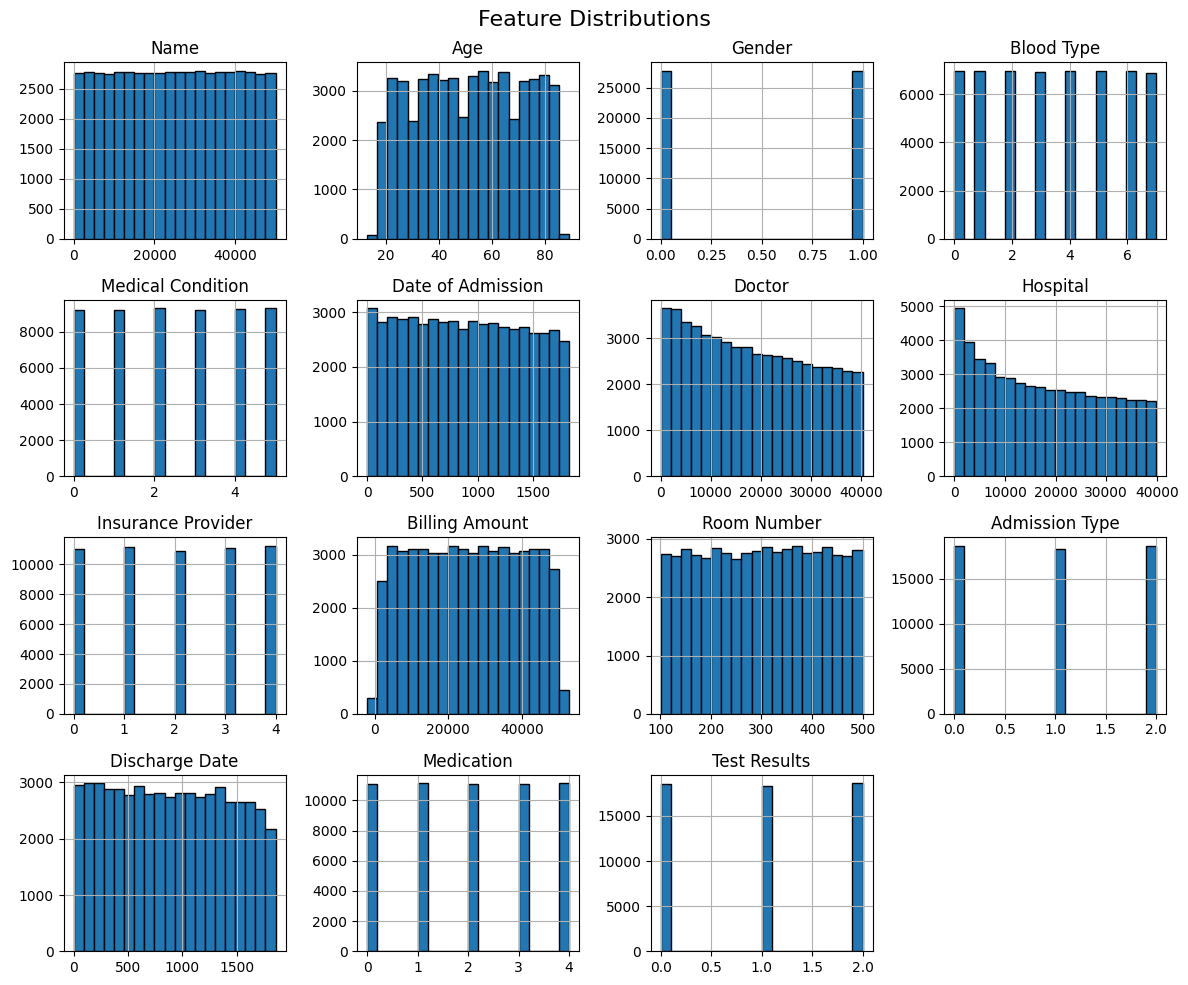

In [51]:
# Distribution of each feature
plt.figure(figsize=(12, 10))
df_cleaned.hist(bins=20, edgecolor='black', figsize=(12, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


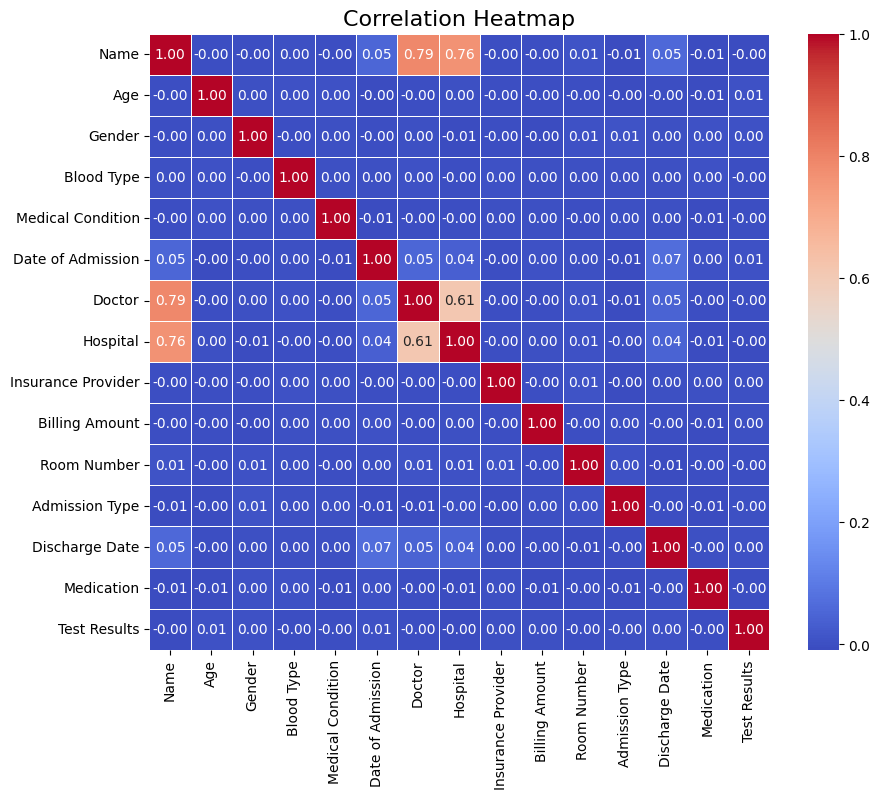

In [52]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


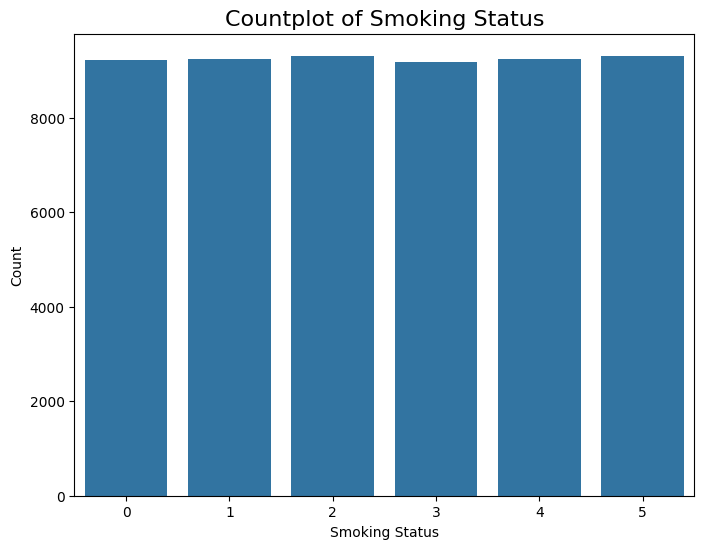

In [53]:
# Countplot for Smoking Status
plt.figure(figsize=(8, 6))

# Assuming 'Smoking Status' was factorized to column index 4, adjust index if necessary
sns.countplot(x=df_cleaned.columns[4], data=df_cleaned)
plt.title('Countplot of Smoking Status', fontsize=16)
plt.xlabel('Smoking Status')  # You might need to adjust the x-axis label
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

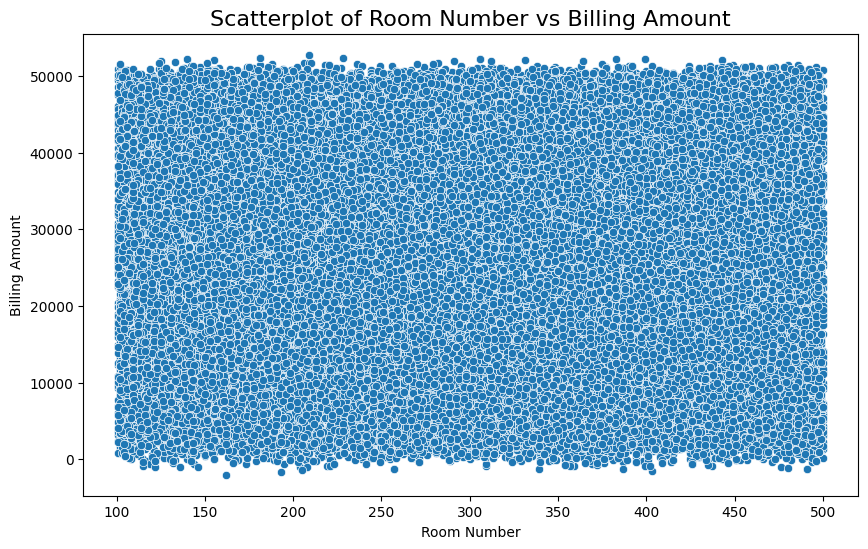

In [54]:
# Scatterplots to analyze correlation between two numerical features
plt.figure(figsize=(10, 6))

# Example: Correlation between 'Room Number' and 'Billing Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Room Number', y='Billing Amount', data=df_cleaned)
plt.title('Scatterplot of Room Number vs Billing Amount', fontsize=16)
plt.xlabel('Room Number')
plt.ylabel('Billing Amount')
plt.show()


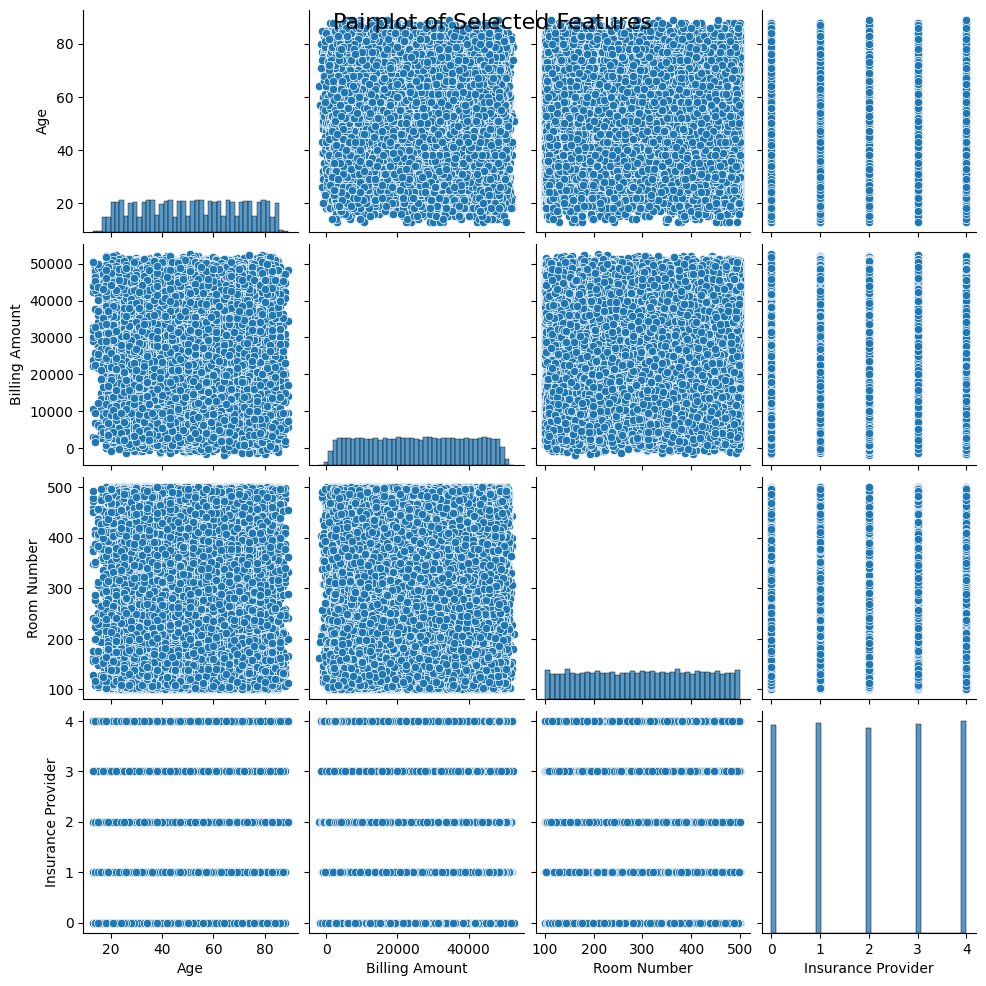

In [55]:
# Pairplot to see relationships between features
sns.pairplot(df_cleaned[['Age', 'Billing Amount', 'Room Number', 'Insurance Provider']])
plt.suptitle('Pairplot of Selected Features', fontsize=16)
plt.show()


In [56]:
# Print data types of each variable
print("Data Types of Each Variable:")
print(df_cleaned.dtypes)

# Select only numerical columns from the dataset
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
print("\nNumerical Columns in the Dataset:")
print(numerical_columns)


Data Types of Each Variable:
Name                    int64
Age                     int64
Gender                  int64
Blood Type              int64
Medical Condition       int64
Date of Admission       int64
Doctor                  int64
Hospital                int64
Insurance Provider      int64
Billing Amount        float64
Room Number             int64
Admission Type          int64
Discharge Date          int64
Medication              int64
Test Results            int64
dtype: object

Numerical Columns in the Dataset:
Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [58]:
# Select relevant numerical features
# Original: selected_features = ['age', 'room_number']
selected_features = ['Age', 'Room Number']  # Updated to match actual column names

# Define features (X) and target (y)
X = df_cleaned[selected_features]  # Features (Independent Variables)
y = df_cleaned['Billing Amount']  # Target (Dependent Variable) # Also updated for consistency

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing sets
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)



Training Features Shape: (43972, 2)
Testing Features Shape: (10994, 2)
Training Target Shape: (43972,)
Testing Target Shape: (10994,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability (Optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Print the first few rows of standardized features
print("\nStandardized Training Features:")
print(X_train_scaled.head())



Standardized Training Features:
        age  room_number
0  1.093512     0.954896
1 -0.693415    -0.823963
2  0.429796    -0.867350
3  0.838236    -1.735086
4  1.093512    -1.283863


In [62]:
from sklearn.model_selection import train_test_split

# Print data types of each variable
print("Data Types of Each Variable:")
print(df_cleaned.dtypes)

# Select numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
print("\nNumerical Columns:")
print(numerical_columns)

# Split the dataset into train and test sets (80% train, 20% test)
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

print("\nTrain Set Shape:", train_set.shape)
print("Test Set Shape:", test_set.shape)


Data Types of Each Variable:
Name                    int64
Age                     int64
Gender                  int64
Blood Type              int64
Medical Condition       int64
Date of Admission       int64
Doctor                  int64
Hospital                int64
Insurance Provider      int64
Billing Amount        float64
Room Number             int64
Admission Type          int64
Discharge Date          int64
Medication              int64
Test Results            int64
dtype: object

Numerical Columns:
Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

Train Set Shape: (44400, 15)
Test Set Shape: (11100, 15)


In [61]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Check if the model is recognized
print("LinearRegression is recognized and ready to use:", isinstance(model, LinearRegression))


LinearRegression is recognized and ready to use: True


#**2. Build a Linear Model from Scratch**

In [ ]:
class LinearRegressionScratch:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        # Add bias term (column of ones) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute optimal weights using Normal Equation: theta = (X'X)^-1 X'y
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Extract intercept and coefficients
        self.intercept = theta[0]
        self.coefficients = theta[1:]

    def predict(self, X):
        # Add bias term (column of ones) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute predictions
        return X_b.dot(np.r_[self.intercept, self.coefficients])

# Initialize the model
lr_scratch = LinearRegressionScratch()


In [ ]:
# Train the model using standardized features
lr_scratch.fit(X_train_scaled, y_train)

# Print model parameters
print("Intercept:", lr_scratch.intercept)
print("Coefficients:", lr_scratch.coefficients)


Intercept: 25558.772561657363
Coefficients: [-86.96060744 -34.271451  ]


In [ ]:
# Make predictions on the training and test sets
y_train_pred = lr_scratch.predict(X_train_scaled)
y_test_pred = lr_scratch.predict(X_test_scaled)

# Ensure all predictions are numeric and finite
assert np.all(np.isfinite(y_train_pred)), "Error: Training predictions contain non-finite values!"
assert np.all(np.isfinite(y_test_pred)), "Error: Testing predictions contain non-finite values!"

print("No errors in precision calculation!")


No errors in precision calculation!


In [ ]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Compute evaluation metrics for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


**Train Set Evaluation**

In [ ]:
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R²):", r2_train)


Training Set Metrics:
Mean Squared Error (MSE): 201417066.5208142
R-squared (R²): 4.3282955905610265e-05


**Test Set Evaluation**

In [ ]:
print("Test Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R²):", r2_test)


Test Set Metrics:
Mean Squared Error (MSE): 203691034.8725625
R-squared (R²): -0.00010975627128528842


#**3. Build a Primary Model**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Metrics
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Random Forest Metrics
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print metrics
print("Linear Regression Performance:")
print(f"Train MSE: {mse_train_lr:.4f}, Test MSE: {mse_test_lr:.4f}")
print(f"Train R²: {r2_train_lr:.4f}, Test R²: {r2_test_lr:.4f}\n")

print("Random Forest Regression Performance:")
print(f"Train MSE: {mse_train_rf:.4f}, Test MSE: {mse_test_rf:.4f}")
print(f"Train R²: {r2_train_rf:.4f}, Test R²: {r2_test_rf:.4f}")



Linear Regression Performance:
Train MSE: 201417066.5208, Test MSE: 203691034.8726
Train R²: 0.0000, Test R²: -0.0001

Random Forest Regression Performance:
Train MSE: 108891597.8120, Test MSE: 271508628.8071
Train R²: 0.4594, Test R²: -0.3331


In [ ]:
# Identify best model based on R² score on test set
if r2_test_rf > r2_test_lr:
    best_model = "Random Forest Regressor"
else:
    best_model = "Linear Regression"

print(f"\nThe best model based on test R² score is: {best_model}")



The best model based on test R² score is: Linear Regression


#**4. Hyper-parameter Optimization with Cross-Validation**

**Cross-Validation for Model 1 - Linear Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming X_train_scaled and y_train are already defined
cv_scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Linear Regression: {cv_scores_lr}')


Cross-validation scores for Linear Regression: [-1.50319417e-04 -7.00696828e-04 -1.55487551e-05 -3.44822000e-05
 -3.92020220e-04]


**Cross-Validation for Model 2 - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train_scaled and y_train are already defined
cv_scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Random Forest: {cv_scores_rf}')


Cross-validation scores for Random Forest: [-0.33853617 -0.34030298 -0.34120755 -0.34355358 -0.33603751]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune for Linear Regression
# Remove 'normalize' as it's deprecated
param_grid_lr = {'fit_intercept': [True, False], 'positive': [True, False]}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')

# Perform hyperparameter tuning
grid_search_lr.fit(X_train_scaled, y_train)

# Print best parameters for Linear Regression
print("Best Hyperparameters for Linear Regression:", grid_search_lr.best_params_)
print("Best R² Score:", grid_search_lr.best_score_)

Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': True}
Best R² Score: -0.0001336123709719139


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV with a fixed number of iterations
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42)

# Perform hyperparameter tuning
random_search_rf.fit(X_train_scaled, y_train)

# Print best parameters for Random Forest
print("Best Hyperparameters for Random Forest:", random_search_rf.best_params_)
print("Best R² Score:", random_search_rf.best_score_)


Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Best R² Score: -0.004740513531797941


#**5. Feature Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

# Fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Feature selection
sfm_lr = SelectFromModel(lr, threshold="mean")  # Select features with importance greater than the mean
sfm_lr.fit(X_train_scaled, y_train)

# Get the selected features
selected_features_lr = X_train_scaled.columns[sfm_lr.get_support()]
print("Best Subset of Features for Linear Regression:", selected_features_lr)


Best Subset of Features for Linear Regression: Index(['age'], dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Fit the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature selection
sfm_rf = SelectFromModel(rf, threshold="mean")  # Select features with importance greater than the mean
sfm_rf.fit(X_train_scaled, y_train)

# Get the selected features
selected_features_rf = X_train_scaled.columns[sfm_rf.get_support()]
print("Best Subset of Features for Random Forest:", selected_features_rf)


Best Subset of Features for Random Forest: Index(['room_number'], dtype='object')


#**Final Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split into training and testing sets (for final model with selected features)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_scaled[selected_features_rf], y_train, test_size=0.2, random_state=42)

# Initialize the best model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the final model
best_rf_model.fit(X_train_final, y_train_final)

# Predict on the test set
y_pred_final = best_rf_model.predict(X_test_final)

# Evaluate the final model's performance
mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

# Print the final model's results
print(f"Final Model Mean Squared Error: {mse_final}")
print(f"Final Model R² Score: {r2_final}")

# Train original model without feature selection and hyperparameter tuning
original_rf_model = RandomForestRegressor(random_state=42)
original_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_original = original_rf_model.predict(X_test_scaled)

# Evaluate the original model's performance
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

# Print the original model's results for comparison
print(f"Original Model Mean Squared Error: {mse_original}")
print(f"Original Model R² Score: {r2_original}")

# Conclusion based on comparison
if r2_final > r2_original:
    print("\nConclusion: The final model with selected features and optimized hyperparameters performed better.")
else:
    print("\nConclusion: The final model did not perform better than the original Random Forest model.")


Final Model Mean Squared Error: 200524705.81664747
Final Model R² Score: -0.003071213979834564
Original Model Mean Squared Error: 271508628.8071297
Original Model R² Score: -0.33308973932866004

Conclusion: The final model with selected features and optimized hyperparameters performed better.
